LINK NOTEBOOK COLAB:
https://colab.research.google.com/drive/10p6QrcBKMKCKdPOMwk3szi0EX67w2n2t#scrollTo=gS_dgRxVvXeu

#DEFINIÇÃO DO PROBLEMA#

CLASSIFICADOR DE ENQUADRAMENTO DE CARGOS DE PROFISSIONAIS

**ETAPAS ANALISE DE DADOS E PRE-PROCESSAMENTO**

**Descrição do problema**: temos um conjunto de registros de enquadramentos de recursos humanos que representam diversos cargos na empresa. Cada cargo é representando por um código de material diferente. Cada material representa um valor em uma condição de preço, que será base para criação de um faturamento ao cliente. **O OBJETIVO DESTE NOTEBOOK É ANALISAR OS DADOS E REALIZAR O PRÉ-PROCESSAMENTO DOS DADOS** a fim de subsidiar a criação um modelo que consiga classificar uma novo registro de enquadramento em algum código de material existente.

**Aprendizado supervisionado**: trata-se de um problema de classificação de aprendizado supervisionado.

**Hipótese**: existem cenários em que dado um funcionário não é possível encontrar todos atributos de enquadramento (previsores) para seleção do material (target). Isso pode ocorrer por algum erro de cadastro do dado mestre do funcionário ou por novos enqudradamentos não previstos. Nessas sistuações, o sistema não gera um faturamento, havendo perda financeira para empresa. O objetivo é que o modelo consiga sempre classificar um conjunto de novos dados num material de faturamento mais próximo da realidade.

**Restrições e condições do Dataset**: O dataset é um exemplo real usando na classificacão de enquadramento de cargos. Não se trata de um dado sensível, uma vez que isoladamente não possui informação confidencial que possa causar prejuízo financeiro a empresa. Portanto, **não há restrição** para seleção dos dados.

**Os atributos do dataset principal Enquadramento HR são:**

1.  Mdt (Mandante Sistema) - representa o número do mandande do Sistema Integrado de Gestão
2.  Faixa SN (Faixa Salarial) - representa um código categórico de faixa salarial do funcionário
3.  Nv de (Nível salaria de) - representa um intervalo de nível salarial de-ate do funcionário
4.  Nv ate (Nível salaria ate) - representa um intervalo de nível salarial de-ate do funcionário
6.  Reg. Trabalho (Regime de Trabalho) - representa um código numérico do regime de trabalho do funcionário
7.  TpGr (Tipo de Garantia de Rendimento) - representa um código categórico do tipo de garantia de rendimento do funcionário
8.  Linha (Linha do Cargo) - representa um código numérico para agrupamento do cargo do funcionário
9.  Cargo (Cargo) - representa um código numérico do cargo do funcionário
10. Val. desde (Validade de) - representa a validade inicial do registro de enquadramento
11. Até (Validade até) - representa a validade final do registro de enquadramento
12. Material (Material) - representa o código do material de enquadramento - Target
13. Classificação (Classificação) - representa um código numérico para classidfificação do agrupamento do funcionário
14. Descrição da classificação (Descrição da classificação) - representa a descrição do cargo do funcionário
15. Criado por (Criado por) - representa o usuário que criou o registro de enquadramento
16. Dt.criação (Data de criação) - representa a data de criação do registro de enquadramento
17. Modificado por (Modificado por) - representa o usuário que modificou o registro de enquadramento
18. Dt.Modificação (Data de Modificação) - representa a data de modificação do registro de enquadramento

**Os atributos do dataset periférico Faixa Salarial são:**

1.  id - representa um código categórico de faixa salarial do funcionário
2.  descricao  - representa a descrição da faixa salarial

**Os atributos do dataset periférico Regime de Trabalho são:**

1.  Empresa - representa um código numérico relativo a empresa no mandante
2.  id - representa um código numperico de regime de trabalho do funcionário
3.  descricao  - representa a descrição do regime de trabalho

**Os atributos do dataset periférico Linha do Cargo são:**

1.  id - representa um código numérico da linha de cargo do funcionário
2.  descricao  - representa a descrição da linha do cargo

**Os atributos do dataset periférico Tipo de Gratificação são:**

1.  id - representa um código categórico do tipo de gratificação do funcionário
2.  descricao  - representa a descrição do tipo de gratificação



#ANÁLISE EXPLORATÓRIA DOS DADOS#



##Informações Gerais e Estatística Descritiva##

Iniciarei a prática importando o pacote Pandas:

In [ ]:
import pandas as pd

# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

Agora irei importar o dataset **Enquadramento de HR** e utilizar a partir de um link no GITHUB, armazenando os dados em um dataframe.

In [ ]:
# Carga do dataset Enquadramento de HR
# url a importar do GITHUB

url_dados_enquadra = 'https://github.com/igorbrasil1978/analise_dados_mvp/blob/main/enquadramento_hr.XLSX?raw=true'

ds_enquadra = pd.read_excel(url_dados_enquadra)

Agora irei importar os datasets periféricos e utilizar a partir de um link no GITHUB, armazenando os dados em um dataframe.

In [ ]:
# Carga do dataset Regime de Trabalho, Faixa Salarial, Tipo de Gratificação e Linha de Cargo
# url a importar do GITHUB

url_dados_regime = 'https://github.com/igorbrasil1978/analise_dados_mvp/blob/main/regime_trabalho.xlsx?raw=true'
ds_regime = pd.read_excel(url_dados_regime)

url_dados_faixa = 'https://github.com/igorbrasil1978/analise_dados_mvp/blob/main/faixa_salarial.xlsx?raw=true'
ds_faixa = pd.read_excel(url_dados_faixa)

url_dados_linha = 'https://github.com/igorbrasil1978/analise_dados_mvp/blob/main/linha_cargo.xlsx?raw=true'
ds_linha = pd.read_excel(url_dados_linha)

url_dados_tp_grat = 'https://github.com/igorbrasil1978/analise_dados_mvp/blob/main/tp_gratificacao.xlsx?raw=true'
ds_tp_grat = pd.read_excel(url_dados_tp_grat)

Irei utilizar alguns comandos da biblioteca Pandas para exibir algumas estatísticas descritivas e fazer uma rápida análise exploratória do dataset **Enquadramento de HR**

In [ ]:
# Quais são os tipos de dados dos atributos? Percebe-se que o campo de data Até veio com object e
# um campo denominado Unnamed: 4 parece ser um campo lixo.

ds_enquadra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5905 entries, 0 to 5904
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Mdt                         5905 non-null   int64         
 1   Faixa SN                    5905 non-null   object        
 2   Nv                          5905 non-null   int64         
 3   Nv.1                        5905 non-null   int64         
 4   Unnamed: 4                  3 non-null      float64       
 5   Reg. Trab.                  5905 non-null   int64         
 6   TpGR                        4600 non-null   object        
 7   Linha                       5905 non-null   int64         
 8   Cargo                       5905 non-null   int64         
 9   Vál.desde                   5905 non-null   datetime64[ns]
 10  até                         5905 non-null   object        
 11  Material                    5905 non-null   object      

In [ ]:
# exibindo os nomes das colunas

ds_enquadra.columns

Index(['Mdt', 'Faixa SN', 'Nv', 'Nv.1', 'Unnamed: 4', 'Reg. Trab.', 'TpGR',
       'Linha', 'Cargo', 'Vál.desde', 'até', 'Material', 'Classificação',
       'Descrição da Classificação', 'Criado por', 'Dt.criação', 'Modif.por',
       'Data mod.'],
      dtype='object')

In [ ]:
# Quantos atributos e instâncias existem?
# Dataset possui 5905 instancias e 18 atributos iniciais.

ds_enquadra.shape

(5905, 18)

In [ ]:
# Quantos atributos e instâncias existem?
# Dataset possui 5905 instancias e 18 atributos iniciais. Veio um atributo denominado Unnamed:4 que
# provavelmente deverá ser descartado.

ds_enquadra.count()

,0
Mdt,5905
Faixa SN,5905
Nv,5905
Nv.1,5905
Unnamed: 4,3
Reg. Trab.,5905
TpGR,4600
Linha,5905
Cargo,5905
Vál.desde,5905


In [ ]:
# exibindo as primeiras linhas.
# Chama a atenção que existe uma coluna denominada 'Unnamed: 4' que parece ter sido carregada indevidamente.
# a Coluna TpGr tem valores nulos NaN
# a coluna data está no padrão americano AAAA-MM-DD. Algumas colunas no formato data veio com tipo object.

ds_enquadra.head()

,Mdt,Faixa SN,Nv,Nv.1,Unnamed: 4,Reg. Trab.,TpGR,Linha,Cargo,Vál.desde,até,Material,Classificação,Descrição da Classificação,Criado por,Dt.criação,Modif.por,Data mod.
0,400,NSA,1,99,NaN,12,9RC,9,0,2010-01-01,9999-12-31 00:00:00,50.000.117,16,COORDENADOR/GERENTE SOBREAVISO,Y1S5,2010-11-23,Y1S5,2010-11-23
1,400,MOFA,5,34,NaN,15,NaN,7,0,2016-01-01,9999-12-31 00:00:00,50.000.427,1,NÍVEL MÉDIO JUNIOR ADMINISTRATIVO,Z435,2016-01-14,Z435,2016-01-14
2,400,MOFA,5,34,NaN,17,NaN,7,0,2016-01-01,9999-12-31 00:00:00,50.000.427,1,NÍVEL MÉDIO JUNIOR ADMINISTRATIVO,Z435,2016-01-14,Z435,2016-01-14
3,400,MOFA,5,34,NaN,18,NaN,7,0,2016-01-01,9999-12-31 00:00:00,50.000.427,1,NÍVEL MÉDIO JUNIOR ADMINISTRATIVO,Z435,2016-01-14,Z435,2016-01-14
4,400,MOFA,5,34,NaN,19,NaN,7,0,2016-01-01,9999-12-31 00:00:00,50.000.427,1,NÍVEL MÉDIO JUNIOR ADMINISTRATIVO,Z435,2016-01-14,Z435,2016-01-14


In [ ]:
# exibindo as últimas linhas

ds_enquadra.tail()

,Mdt,Faixa SN,Nv,Nv.1,Unnamed: 4,Reg. Trab.,TpGR,Linha,Cargo,Vál.desde,até,Material,Classificação,Descrição da Classificação,Criado por,Dt.criação,Modif.por,Data mod.
5900,400,SNSB,18,24,NaN,27,NaN,15,0,2019-01-01,9999-12-31 00:00:00,50.000.127,14,PROFISSIONAL SENIOR ADMINISTRATIVO,Y1S5,2019-04-02,Y1S5,2019-04-02
5901,400,SNSB,25,32,NaN,27,NaN,15,0,2018-12-31,2018-12-31 00:00:00,50.001.501,12,PROFISSIONAL MASTER ADMINISTRATIVO,Z434,2019-04-01,Z434,2019-04-01
5902,400,SNSB,25,32,NaN,27,NaN,15,0,2019-01-01,9999-12-31 00:00:00,50.001.501,12,PROFISSIONAL MASTER ADMINISTRATIVO,Y1S5,2019-04-02,Y1S5,2019-04-02
5903,400,SNSB,25,50,NaN,27,NaN,10,0,2019-01-01,9999-12-31 00:00:00,50.000.127,14,PROFISSIONAL SENIOR ADMINISTRATIVO,Z434,2019-04-01,Z434,2019-04-01
5904,400,SNSB,25,50,NaN,27,NaN,9,0,2019-01-01,9999-12-31 00:00:00,50.000.127,14,PROFISSIONAL SENIOR ADMINISTRATIVO,Z434,2019-04-01,Z434,2019-04-01


In [ ]:
# Resumo estatístico dos atributos com valor numérico

ds_enquadra.describe()

,Mdt,Nv,Nv.1,Unnamed: 4,Reg. Trab.,Linha,Cargo,Vál.desde,Classificação,Dt.criação,Data mod.
count,5905.0,5905.000000,5905.000000,3.000000,5905.000000,5905.000000,5.905000e+03,5905,5905.000000,5905,5905
mean,400.0,13.903810,80.832684,20.500000,9.665199,11.891617,1.454891e+07,2015-01-19 14:51:33.378492928,8.368332,2015-08-25 00:48:02.438611456,2016-02-13 00:28:46.536833280
min,400.0,1.000000,9.000000,6.000000,1.000000,6.000000,0.000000e+00,2004-10-01 00:00:00,1.000000,2008-10-16 00:00:00,2008-10-16 00:00:00
25%,400.0,1.000000,61.000000,12.000000,2.000000,10.000000,0.000000e+00,2010-01-01 00:00:00,5.000000,2010-04-15 00:00:00,2011-02-02 00:00:00
50%,400.0,1.000000,99.000000,18.000000,8.000000,12.000000,0.000000e+00,2017-01-01 00:00:00,7.000000,2017-06-08 00:00:00,2017-06-08 00:00:00
75%,400.0,28.000000,99.000000,27.750000,12.000000,14.000000,5.000095e+07,2019-01-01 00:00:00,11.000000,2019-04-01 00:00:00,2019-08-28 00:00:00
max,400.0,62.000000,99.000000,37.500000,27.000000,16.000000,5.284927e+07,2020-07-01 00:00:00,18.000000,2023-03-21 00:00:00,2023-03-21 00:00:00
std,0.0,21.137172,25.118050,15.898113,8.374827,3.096370,2.311789e+07,NaN,4.717886,NaN,NaN


In [ ]:
#há dados faltantes?
#Unnamed:4 e TpGR. O primeiro atributo será excluído, o segundo tratado, ambos na etapa de pre-processamento

ds_enquadra.isna().sum()

,0
Mdt,0
Faixa SN,0
Nv,0
Nv.1,0
Unnamed: 4,5902
Reg. Trab.,0
TpGR,1305
Linha,0
Cargo,0
Vál.desde,0


In [ ]:
# Há dados duplicados?
# Não há dados duplicados.

ds_enquadra.loc[ds_enquadra.duplicated()]

,Mdt,Faixa SN,Nv,Nv.1,Unnamed: 4,Reg. Trab.,TpGR,Linha,Cargo,Vál.desde,até,Material,Classificação,Descrição da Classificação,Criado por,Dt.criação,Modif.por,Data mod.


In [ ]:
# Verifica a distribuição das classes - target. A target Material está desbalanciada.
# Possível necessidade futura de balanceamento de classes.

ds_enquadra.groupby('Material').size()

,0
Material,
50.000.097,682
50.000.099,964
50.000.100,128
50.000.101,36
50.000.102,16
50.000.103,44
50.000.109,40
50.000.110,64
50.000.111,80


In [ ]:
#Imprimindo a distribuição dos dados categóricos

ds_enquadra.select_dtypes(include='object').describe()

,Faixa SN,TpGR,até,Material,Descrição da Classificação,Criado por,Modif.por
count,5905,4600,5905,5905,5905,5905,5905
unique,14,18,11,40,55,7,7
top,NMA,9RM,9999-12-31 00:00:00,50.000.099,CONSULTOR ADMINISTRATIVO,Y1S5,Y1S5
freq,1382,671,4218,964,964,2745,2728


Agora vou analisar os datasets periféricos. Cada dataset representa a descrição e código de identificação na tabela Enquandramento de HR.

In [ ]:
# exibindo as primeiras linhas do dataset Regime de Trabalho

ds_regime.head()

,Empresa,id,descricao
0,1000,1,Administrativo
1,1000,2,Adm. Reduzido 25%
2,1000,3,Turno de 06 Horas
3,1000,4,Turno de 08 Horas
4,1000,5,Turno de 12 Horas


In [ ]:
# exibindo as primeiras linhas do dataset Faixa Salarial

ds_faixa.head()

,id,decricao
0,MOFA,Marítimo Grupo A
1,MOFB,Marítimo Grupo B
2,N.MEDIO,Nível Médio
3,N.SUP-LA,Nível Superior Grupo LA
4,N.SUP-LE,Nível Superior Grupo LB


In [ ]:
# exibindo as primeiras linhas do dataset Tipo de Gratificação

ds_tp_grat.head()

,id,desricao
0,GCS,CONSULTOR
1,9RM,COORDENADOR/GERENTE/CONSULTOR
2,9RG,COORDENADOR/GERENTE/CONSULTOR
3,9RC,COORDENADOR/GERENTE/CONSULTOR
4,9RB,COORDENADOR/GERENTE/CONSULTOR


In [ ]:
# exibindo as primeiras linhas do dataset Linha do Cargo

ds_linha.head()

,id,decsricao
0,1,Nível Superior - Administração
1,2,Nível Superior - Engenharia
2,3,"Nível Médio - Técnico, com exigência de curso ..."
3,4,"Nível Médio - Técnico, sem exigência de curso ..."
4,5,Nível Médio - Não Técnico


##Visualizações Unimodais##

Importanto pacote para visualização dos dados.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

A target Material está desbalanciada. Possível necessidade futura de balanceamento de classes.

Text(0.5, 1.0, 'Distribuição do Target')

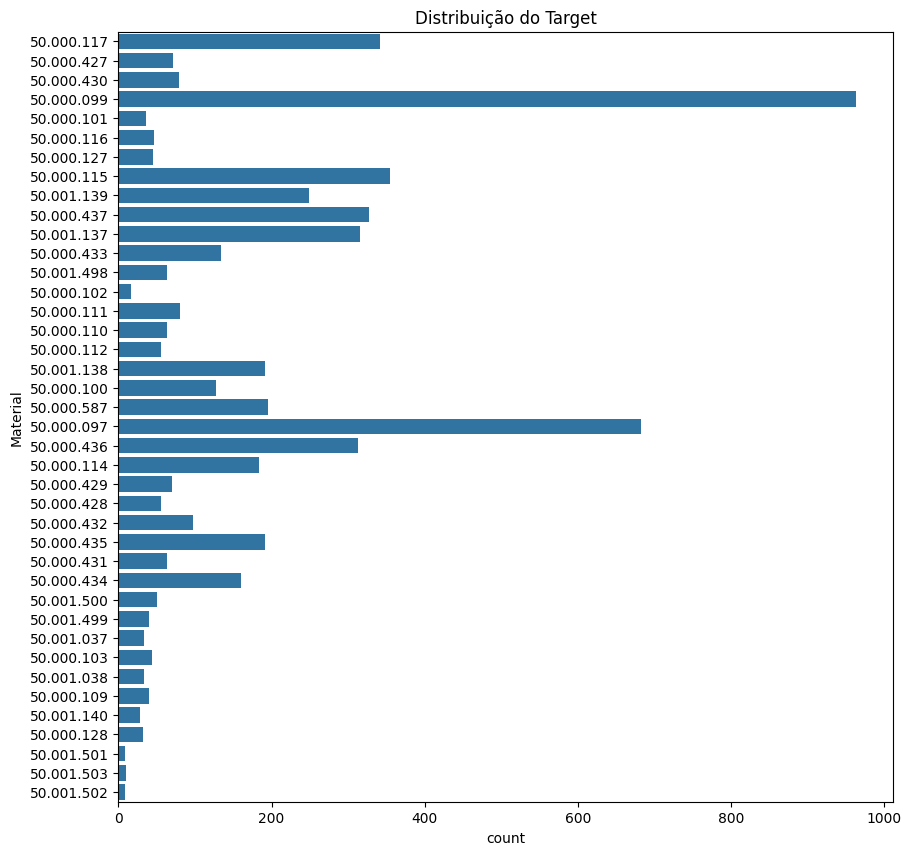

In [ ]:
# Quantos objetos/observações existem para o atributo Material?
# Melhor visualização pelo gráfico de barras

plt.subplots(figsize=(10,10))
sns.countplot(ds_enquadra['Material']).set_title('Distribuição do Target')

Os campos para análise de dados são categóricos, logo a visualização fica mais aparente através da quantidade de registros dado um atributo categórico.

Aqui vou fazer o Merge do dataframe Enquadramento HR onde possui os identificadores (chave estranheira) com as tabelas periféricas que possuem a descrição.

Text(0, 0.5, 'Qtd Faixa Salariais')

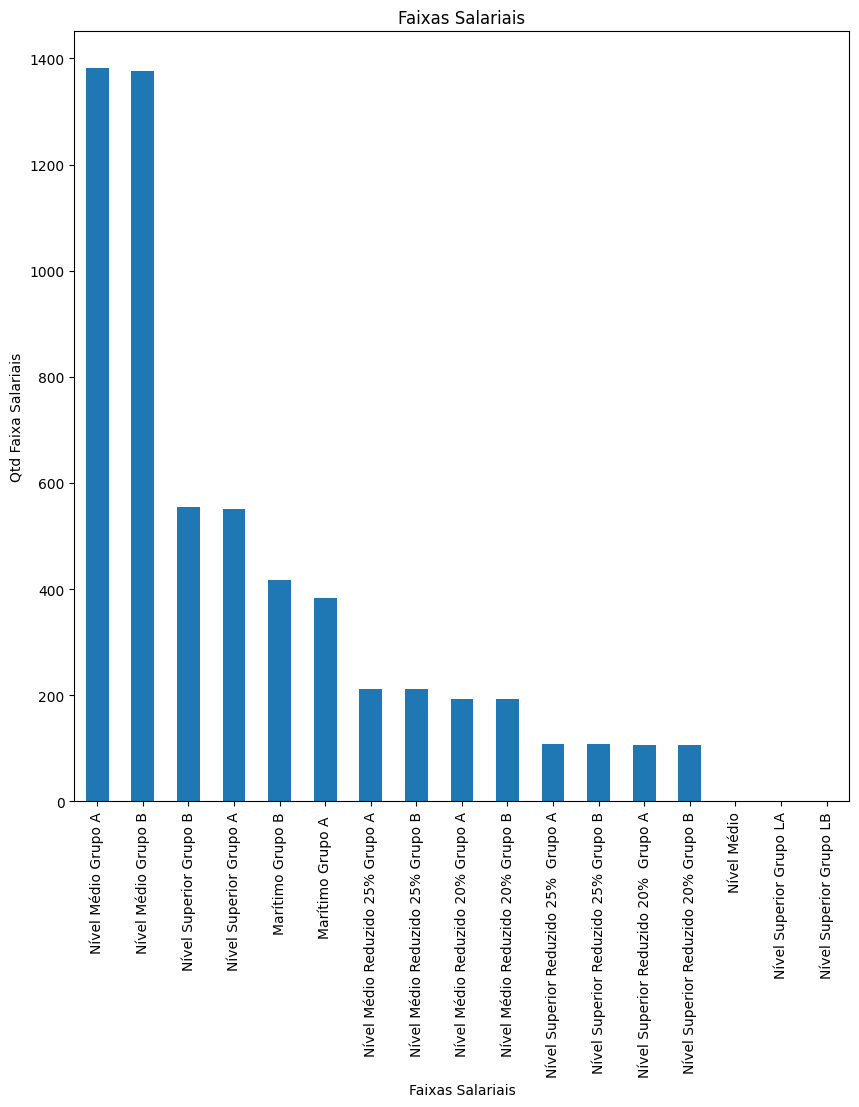

In [ ]:
#visualizando as faixas salariais. Percebe-se que existem maiores enquadramentos de HR para as faixas
# de nível médio. Provavelmente, o plano de cargos e salarios do nível médio possui mais combinações dentro
# da empresa.

plt.subplots(figsize=(10,10))
ds_enquadra_aux = ds_enquadra.merge(ds_faixa, left_on='Faixa SN', right_on='id', how='outer')
ax = ds_enquadra_aux['decricao'].value_counts().plot(kind='bar')
ax.set_title('Faixas Salariais')
ax.set_xlabel('Faixas Salariais')
ax.set_ylabel('Qtd Faixa Salariais')

Text(0, 0.5, 'Qtd gratificação')

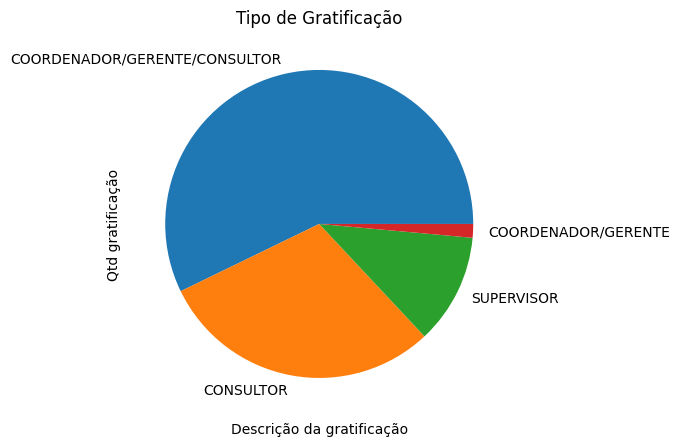

In [ ]:
# Quantos objetos/observações existem para o atributo Gratificação ?
# Pela análise, percebe-se que existem maiores combinações de para os profissionais que estão aptos
# a assumir um cargo de cooordenador ou consultor ou gerente.

plt.subplots(figsize=(5,5))
ds_enquadra_aux = ds_enquadra.merge(ds_tp_grat, left_on='TpGR', right_on='id', how='outer')

ax = ds_enquadra_aux['desricao'].value_counts().plot(kind='pie')

ax.set_title('Tipo de Gratificação')
ax.set_xlabel('Descrição da gratificação')
ax.set_ylabel('Qtd gratificação')

Text(0, 0.5, 'Qtd Regime de Trabalho')

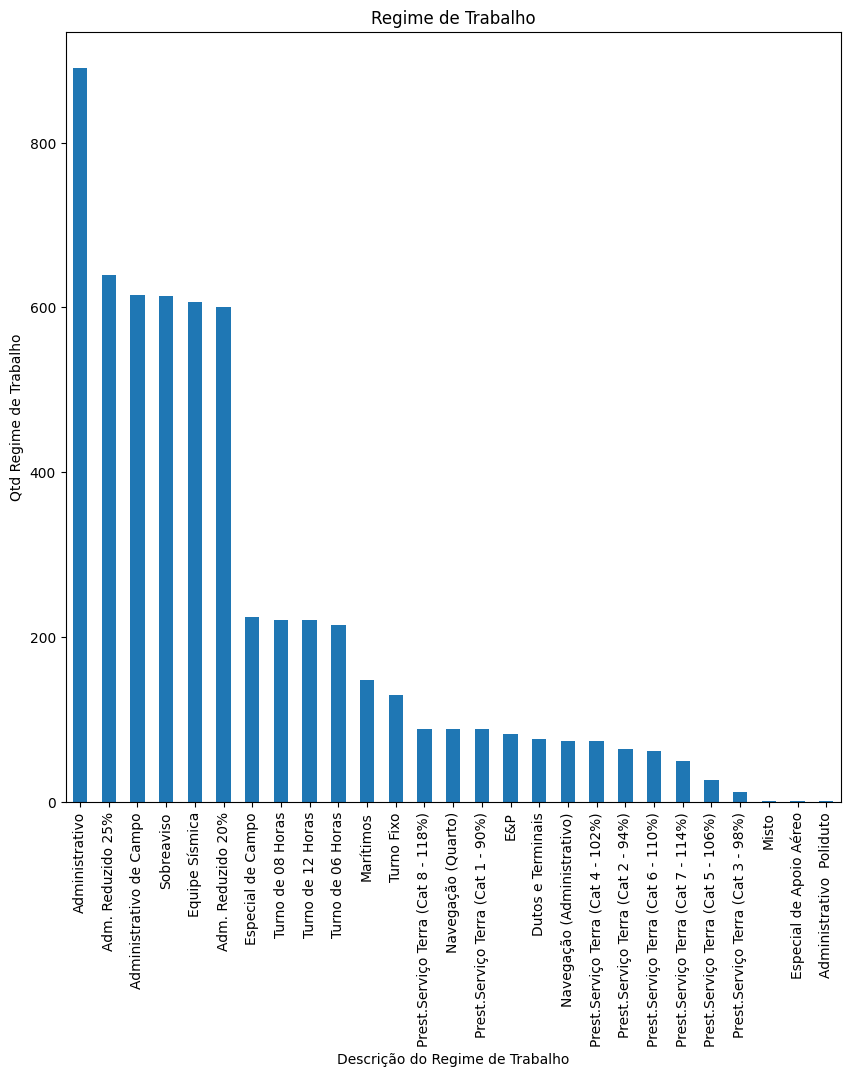

In [ ]:
# Pela análise, percebe-se que grante parte da empresa devem possuir empregados que trabalham
# no regime de trabalho Administrativo.

plt.subplots(figsize=(10,10))

ds_regime_aux = ds_regime.loc[ds_regime['Empresa'] == 1000]
ds_enquadra_aux = ds_enquadra.merge(ds_regime_aux, left_on='Reg. Trab.', right_on='id', how='outer')
ax = ds_enquadra_aux['descricao'].value_counts().plot(kind='bar')
ax.set_title('Regime de Trabalho')
ax.set_xlabel('Descrição do Regime de Trabalho')
ax.set_ylabel('Qtd Regime de Trabalho')


#PRÉ-PROCESSAMENTO DE DADOS#

Em conversa com o Analista de Negócios da empresa foi passado que os atributos relevantes (atributos previsores) para classificação do enquadramento são:


1. Faixa SN (Faixa Salarial)
2. NV (Nível salarial de)
3. Nv.1 (Nível salarial até)
4. Reg.Trab. (Regime de trabalho)
5. TpGr (Tipo de garantia de rendimento)
6. Linha (Linha do cargo)
7. Cargo


A composição dessas features levam a classificação de um material que chamamos material de enquadramento (atributo target).

a) O Analista de Negócios explicou que são válidos os registros com valor 31.12.9999 no atributo até (Data Vigência Até).

b) O Analista de Negócios explicou que os atributos NV e NV.1 representam um intervalo de nível salarial de-até. Porém as novas entradas de dados é feita através de apenas um nível salarial. Serão criados grupos para representar cada intervalo.

c) As demais colunas do dataset são irrelavantes para o modelo.

d) O Analista de Negócio explicou que o campo TpGr não é obrigatório. Logo, em alguns registros são dados faltantes. Será representado por SEM (Sem tipo) os dados faltantes desse atributo, significando que não possui um tipo de gatantia de rendimento.



##Limpeza e Transformação de dados##

Tratamento de missing, transformação de dados, limpeza de dados.

Importando pacotes auxiliar para tranformação de dados

In [ ]:
from datetime import datetime

A seleção dos dados segundo validade diminuiu as instâncias do dataset, provavelmente algumas instâncias estão fora da validade.

In [ ]:
# a) Selecionando apenas os dados com validade até 31.12.9999
data_str = '9999-12-31'
data_datetime = datetime.strptime(data_str, "%Y-%m-%d")
ds_enquadra = ds_enquadra[ds_enquadra['até'] == data_datetime ]

#Quantidade de instâncias após o tratamento
ds_enquadra.shape

(4218, 18)

Aqui foi feito um agrupamento de nível salarial, uma vez que cada funcionário possui apenas 1 nível, e o dataset original possui informação com intervalos de nível De-Até.

In [ ]:
# b) Tranformando a coluna Nivel da-até em apenas uma coluna criando grupos para representar cada intervalo
ds_agrupamento_nivel = ds_enquadra[['Nv','Nv.1']]
agrupamento_nivel = ds_agrupamento_nivel.groupby(['Nv','Nv.1'])
agrupamento = 1
# recurso para criar um dataframe vazio com as mesmas colunas e tipos da original
ds_enquadra_nivel = ds_enquadra[ds_enquadra['Mdt'] == 100]
if not 'Med Nivel' in ds_enquadra.columns:
    ds_enquadra_nivel.insert(2, 'Med Nivel', 0)
for nivel, grupo in agrupamento_nivel:
  nivel_de = nivel[0]
  nivel_ate = nivel[1]
  ds_enquadra_aux = ds_enquadra[(ds_enquadra['Nv'] == nivel_de) & (ds_enquadra['Nv.1'] == nivel_ate)]
  if not 'Med Nivel' in ds_enquadra_aux.columns:
    ds_enquadra_aux.insert(2, 'Med Nivel', 0)
  ds_enquadra_aux['Med Nivel'] = agrupamento
  print(nivel, 'Grupo --> ', agrupamento)
  ds_enquadra_nivel = pd.concat([ds_enquadra_nivel, ds_enquadra_aux])
  agrupamento = agrupamento + 1

(1, 9) Grupo -->  1
(1, 11) Grupo -->  2
(1, 13) Grupo -->  3
(1, 22) Grupo -->  4
(1, 24) Grupo -->  5
(1, 27) Grupo -->  6
(1, 31) Grupo -->  7
(1, 51) Grupo -->  8
(1, 57) Grupo -->  9
(1, 62) Grupo -->  10
(1, 70) Grupo -->  11
(1, 99) Grupo -->  12
(5, 34) Grupo -->  13
(6, 10) Grupo -->  14
(9, 34) Grupo -->  15
(10, 24) Grupo -->  16
(11, 17) Grupo -->  17
(12, 24) Grupo -->  18
(18, 24) Grupo -->  19
(18, 34) Grupo -->  20
(19, 34) Grupo -->  21
(22, 34) Grupo -->  22
(23, 34) Grupo -->  23
(25, 32) Grupo -->  24
(25, 34) Grupo -->  25
(25, 50) Grupo -->  26
(28, 32) Grupo -->  27
(28, 52) Grupo -->  28
(33, 37) Grupo -->  29
(33, 51) Grupo -->  30
(34, 50) Grupo -->  31
(35, 36) Grupo -->  32
(37, 42) Grupo -->  33
(38, 42) Grupo -->  34
(39, 55) Grupo -->  35
(40, 43) Grupo -->  36
(41, 70) Grupo -->  37
(43, 52) Grupo -->  38
(44, 60) Grupo -->  39
(52, 52) Grupo -->  40
(52, 60) Grupo -->  41
(52, 70) Grupo -->  42
(53, 61) Grupo -->  43
(57, 65) Grupo -->  44
(58, 70) Grup

Aqui foi feito a eliminação de atributos irrelevantes para o contexto do modelo.

In [ ]:
# c) dropando as colunas irrelevantes
# Quando alterei a leiura dos dados para o GITHUB o dataset veio com uma coluna diferente Unnamed: 4

ds_enquadramento = ds_enquadra_nivel.drop(columns=['Mdt', 'Nv', 'Nv.1', 'Unnamed: 4', 'Vál.desde','até','Classificação','Descrição da Classificação','Criado por','Dt.criação','Modif.por','Data mod.'])

ds_enquadramento.head()


,Faixa SN,Med Nivel,Reg. Trab.,TpGR,Linha,Cargo,Material
3562,NSA,1,1,NaN,9,0,50.000.101
3564,NSA,1,3,NaN,9,0,50.001.037
3567,NSA,1,4,NaN,9,0,50.001.037
3569,NSA,1,5,NaN,9,0,50.001.037
3571,NSA,1,6,NaN,9,0,50.000.103


Existem 642 instancias do dataset com atributo TpGr vazio. Preencher os dados faltantes.

In [ ]:
# d) Preencher os dados faltantes da coluna TpGr com SEM (SEM tipo de garantia de rendimento)

print(ds_enquadramento.isna().sum()) #642 dados faltantes

Faixa SN        0
Med Nivel       0
Reg. Trab.      0
TpGR          642
Linha           0
Cargo           0
Material        0
dtype: int64


Importando pacote para tratamento de dados faltantes

In [ ]:
import missingno as ms # para tratamento de missings

<Axes: >

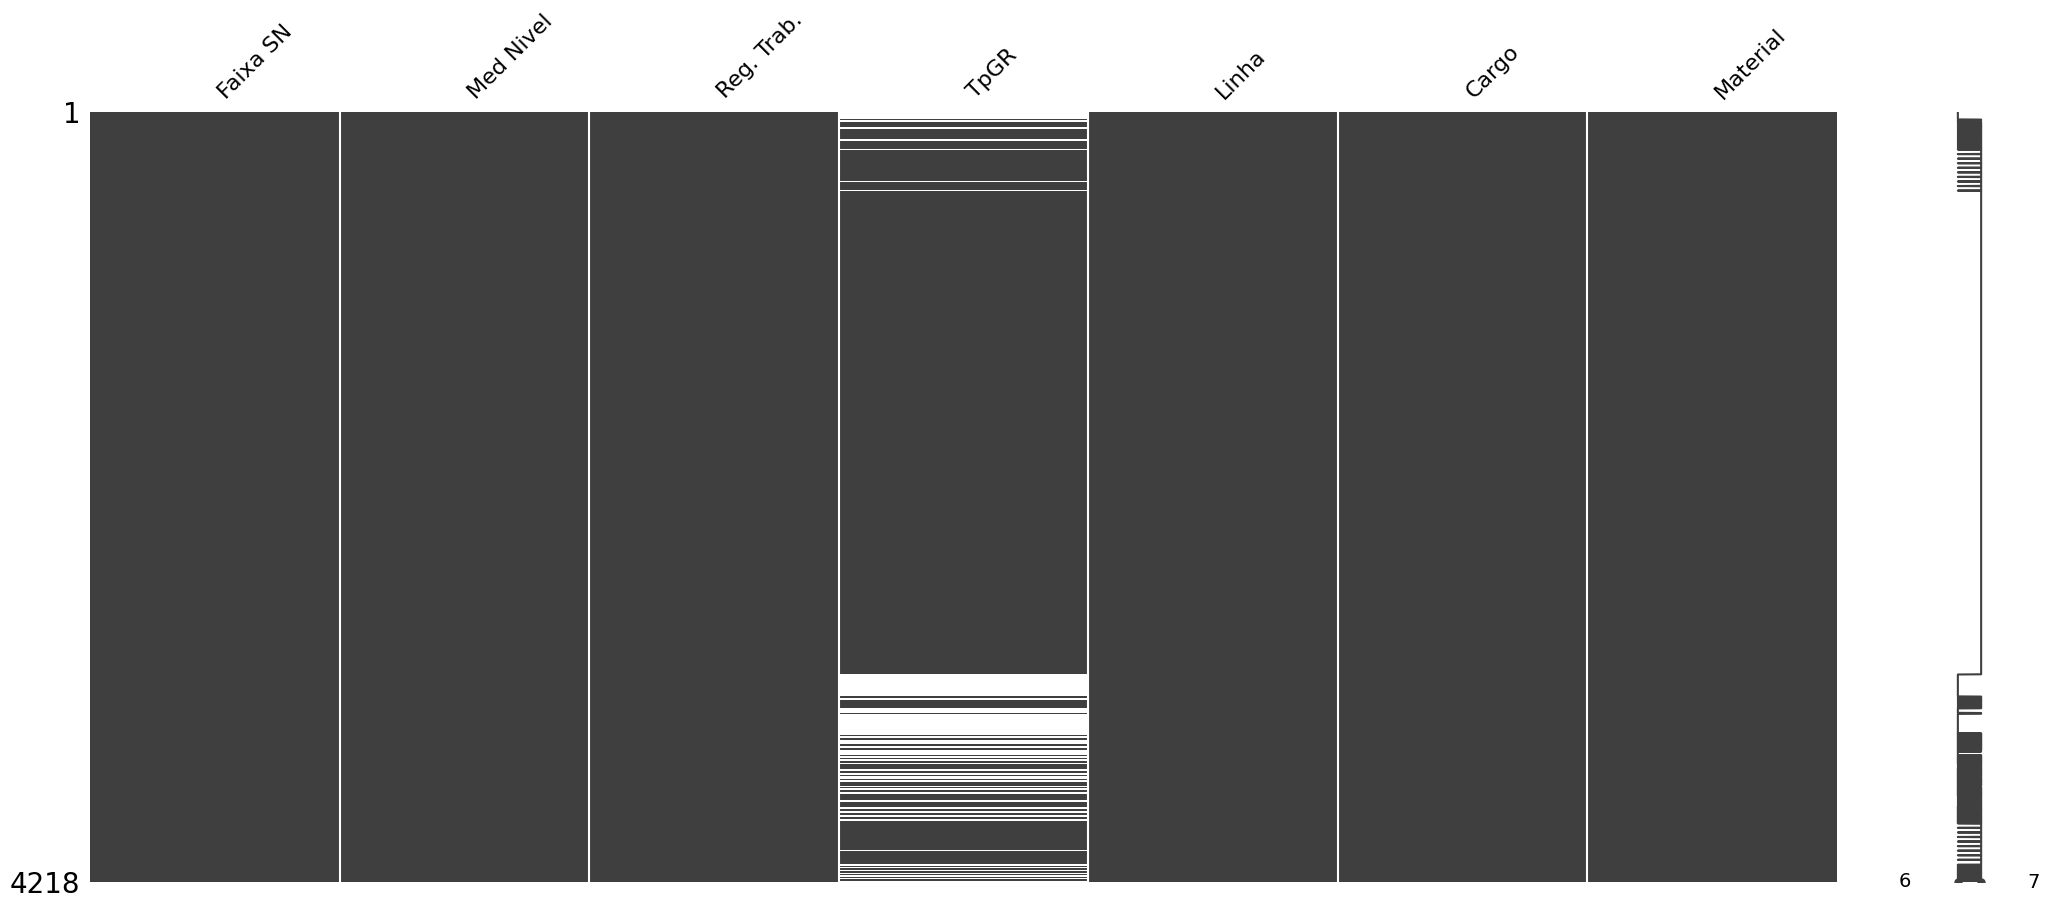

In [ ]:
# criando variavel auxiliar para visualização de missing
ds_enquadramentoComMissings = ds_enquadramento

# exibindo visualização matricial da nulidade do dataset
ms.matrix(ds_enquadramentoComMissings)

<Axes: >

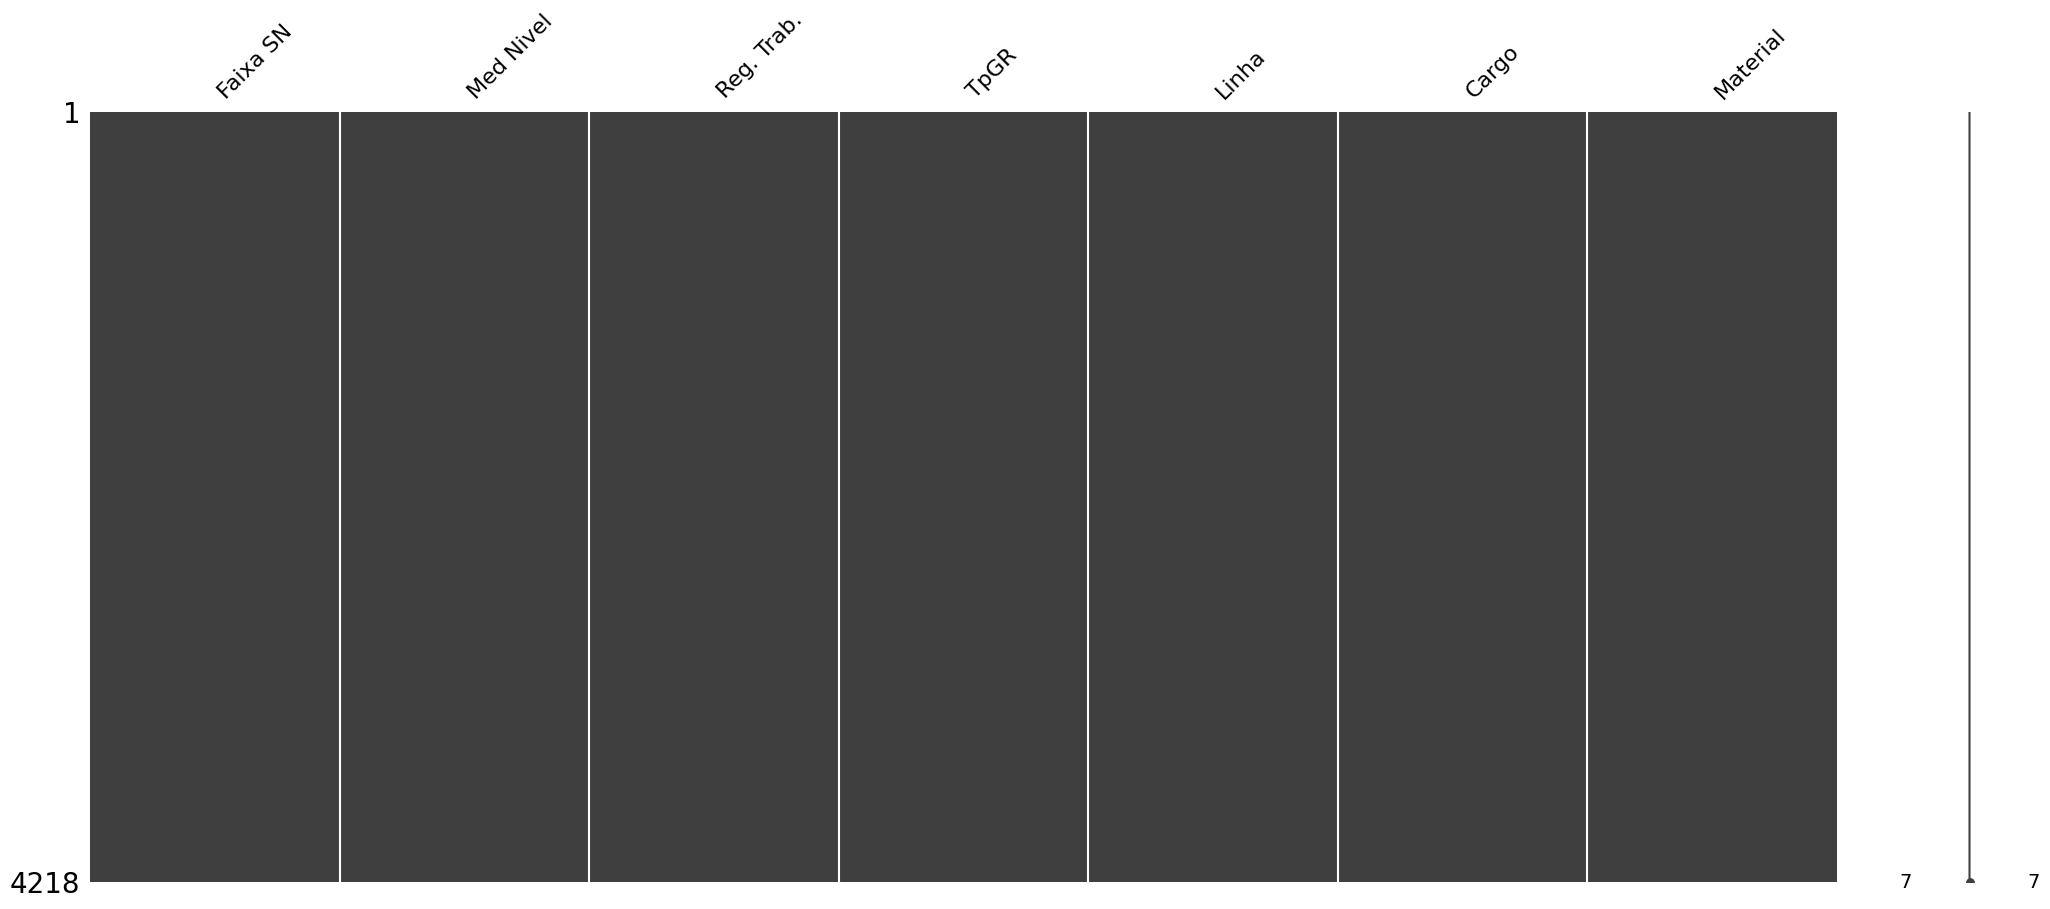

In [ ]:
values = {"TpGR": "SEM"}
ds_enquadramento = ds_enquadramento.fillna(value=values)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(ds_enquadramento)


In [ ]:
# dataset após a limpeza e tranformação de dados
ds_enquadramento.head()

,Faixa SN,Med Nivel,Reg. Trab.,TpGR,Linha,Cargo,Material
3562,NSA,1,1,SEM,9,0,50.000.101
3564,NSA,1,3,SEM,9,0,50.001.037
3567,NSA,1,4,SEM,9,0,50.001.037
3569,NSA,1,5,SEM,9,0,50.001.037
3571,NSA,1,6,SEM,9,0,50.000.103


##Transformação Categórica##

###Label Encoding###

Podemos utilizar as operação de Label encondig usando a biblioteca Scikit-learn.

Importando pacote de LabelEncoder para transformação categóricas

In [ ]:
#Import de pacote

from sklearn.preprocessing import LabelEncoder

In [ ]:
# separando o array em componentes de previsor e target
ds_enquadramento_previsor = ds_enquadramento.iloc[:, 0:6]
ds_enquadramento_target = ds_enquadramento.iloc[:,6]

#Transformação do target categorico em numérico usando LabelEnconder
label_enconder_target = LabelEncoder()
ds_enquadramento_target = label_enconder_target.fit_transform(ds_enquadramento_target)

#Transformação dos previsores categoricos em numérico usando LabelEnconder
label_enconder_previsor_faixa = LabelEncoder()
label_enconder_previsor_tpgr = LabelEncoder()
ds_enquadramento_previsor = ds_enquadramento_previsor.values
ds_enquadramento_previsor[:,0] = label_enconder_previsor_faixa.fit_transform(ds_enquadramento_previsor[:,0])
ds_enquadramento_previsor[:,3] = label_enconder_previsor_tpgr.fit_transform(ds_enquadramento_previsor[:,3])

print('Atributos transformados:')
print(ds_enquadramento_previsor)
print(ds_enquadramento_target)

Atributos transformados:
[[4 1 1 13 9 0]
 [4 1 3 13 9 0]
 [4 1 4 13 9 0]
 ...
 [11 48 27 13 16 0]
 [11 48 27 8 13 0]
 [11 48 27 8 16 0]]
[ 2 22 22 ... 28 28 28]


##Transformação Numérica##

Podemos utilizar as operações de normalização e padronização usando a biblioteca Scikit-learn.

###Normalização###

y = (x – min) / (max – min)

Importando biblioteca para Normalização.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# definindo o transformador como min max scaler
scaler = MinMaxScaler()

# transformando os dados
scaled = scaler.fit_transform(ds_enquadramento_previsor)
ds_enquadramento_previsor = scaled
print('Dados normalizados:')
print(ds_enquadramento_previsor)

Dados normalizados:
[[0.30769231 0.         0.         1.         0.3        0.        ]
 [0.30769231 0.         0.07692308 1.         0.3        0.        ]
 [0.30769231 0.         0.11538462 1.         0.3        0.        ]
 ...
 [0.84615385 1.         1.         1.         1.         0.        ]
 [0.84615385 1.         1.         0.61538462 0.7        0.        ]
 [0.84615385 1.         1.         0.61538462 1.         0.        ]]


###Padronização###

média = soma (x) / contagem (x)

desvio_ padrão = sqrt (soma ((x - média) ^ 2) / contagem (x))

y = (x - média) / desvio padrão

Importando biblioteca para Padronização.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# definindo o transformador como standard scaler
scaler = StandardScaler()

# transformando os dados
scaled = scaler.fit_transform(ds_enquadramento_previsor)
ds_enquadramento_previsor = scaled
print('Dados padronizados:')
print(ds_enquadramento_previsor)

Dados padronizados:
[[-0.09559183 -1.41754091 -1.07574346  1.07033481 -0.73085859 -0.81176741]
 [-0.09559183 -1.41754091 -0.85783606  1.07033481 -0.73085859 -0.81176741]
 [-0.09559183 -1.41754091 -0.74888235  1.07033481 -0.73085859 -0.81176741]
 ...
 [ 1.93348391  2.48868654  1.75705283  1.07033481  1.41164844 -0.81176741]
 [ 1.93348391  2.48868654  1.75705283 -0.26370935  0.49343114 -0.81176741]
 [ 1.93348391  2.48868654  1.75705283 -0.26370935  1.41164844 -0.81176741]]


##Balanceamento dos Dados##

Realizando o balanceamento da variável Target, uma vez que através da análise dos dados foi identificado um grande desbalanceamento entre o atributo alvo de maior incidência e menor incidência.

Provavelmente, com a técnica de balanceamento os modelos tornaram-se mais lentos, mas a acurácia melhora.

Importando o pacote SMOTE de Balancimamento

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
#criar o balanceador de dados - Oversampling

smote_bal = SMOTE(random_state=100)
ds_enquadramento_previsor, ds_enquadramento_target = smote_bal.fit_resample(ds_enquadramento_previsor, ds_enquadramento_target )

print('Variável target balanciada.')
print(pd.DataFrame(ds_enquadramento_target).groupby(0).size())

print('Total de instâncias após o Balanceamento.')
ds_enquadramento_previsor.shape

Variável target balanciada.
0
0     857
1     857
2     857
3     857
4     857
5     857
6     857
7     857
8     857
9     857
10    857
11    857
12    857
13    857
14    857
15    857
16    857
17    857
18    857
19    857
20    857
21    857
22    857
23    857
24    857
25    857
26    857
27    857
28    857
29    857
30    857
31    857
32    857
33    857
dtype: int64
Total de instâncias após o Balanceamento.


(29138, 6)

##Visualizações Multimodais##

Aqui vou usar o Heat Maps para identificar padrões, variações e tendências no conjunto de dados do dataframe.

Visualizações após o pré-processamento.

<Axes: >

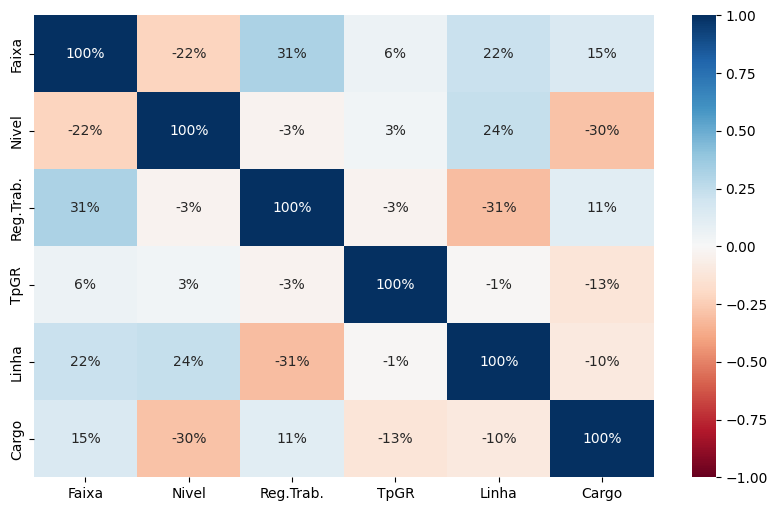

In [ ]:
#visualizando as correlações entre os atributos previsores

plt.subplots(figsize=(10,6))
ds_enquadramento_corr = pd.DataFrame(ds_enquadramento_previsor, columns=['Faixa','Nivel','Reg.Trab.','TpGR','Linha','Cargo'])
sns.heatmap(ds_enquadramento_corr.corr(), annot=True, fmt='.0%', cmap='RdBu', vmin=-1, vmax=1)